In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def Factorial(X, x, i):
    """
    用于求基函数
    """
    num = 1
    for val in X:
        if X[i] == val:
            continue
        num = num * (x - val)
    return num

In [3]:
def Lagrange_interpolation(X, Y, x):
    """
    拉格朗日插值法
    """
    y = 0
    for i in range(len(X)):
        y += Factorial(X, x, i)/Factorial(X, X[i], i) * Y[i]
    return y

In [4]:
def Dif(X, Y, *, showDif=True):
    """
    差商
    """
    D = Y
    for i in range(1, len(D)):
        for j in range(len(D)-1, i-1, -1):
            D[j] = (D[j] - D[j - 1]) / (X[j] - X[j - i])
    
    """
    showDif
    """
    if showDif:
        print("差商:")
        for i in range(0, len(D)):
            print("f(", end="")
            for j in range(0, i):
                print(f"x{j},", end="")
            print(f"x{i}", end="")
            print(f")={D[i]}")
    return D

In [5]:
def Newton_interpolation(X, Y, x, D):
    """
    牛顿插值
    """
    mult = 1
    y = 0
    for i in range(0, len(X)):
        y += mult * D[i]
        mult = mult * (x - X[i])
    return y

In [6]:
def Newton_para(X, Y, x, *, showDif_para=True):
    """
    牛顿插值的参数，避免D的重复计算和错误输入
    """
    D = Dif(X, Y, showDif=showDif_para)
    return Newton_interpolation(X, Y, x, D)

In [7]:
def frac_test(*, lower_bound=-2, upper_bound=2, points=11, bound_bias=0, showDif=True):
    
    """
    
    [lower_bound, upper_bound]: 给定点的范围
    points: 取点个数
    bound_bias: 插值范围的偏移量
    """
    if points > 10:
        showDif=False
    
    X = np.linspace(lower_bound, upper_bound, 100)
    Y = 4/(1+X ** 2)
    
    # 给定点
    someX = np.linspace(lower_bound, upper_bound, points)
    someY = 4/(1+someX ** 2)
    
    # 拉格朗日插值法
    L_X = np.linspace(lower_bound-bound_bias, upper_bound+bound_bias, 100)
    L_Y = Lagrange_interpolation(someX, someY, L_X)
    
    # 牛顿插值法
    N_X = L_X
    N_Y = Newton_para(someX, someY, N_X, showDif_para=showDif)
    
    # 两种方法的误差
    bias_X = L_X
    bias_Y = L_Y-N_Y
    NL_bias=max(bias_Y)
    
    fig, ax = plt.subplots()
    plt.grid(visible=True)
    ax.plot(X, Y, label="origin")
    ax.plot(L_X, L_Y, label="Lagrange")
    ax.plot(N_X, N_Y, label = "Newton")
    ax.plot(bias_X, bias_Y, label="bias")
    ax.set_title(f"Test, {points}points, 4/(1+x^2)\nNL_bias={round(NL_bias, 12)}")
    ax.legend()
    plt.show()

差商:
f(x0)=0.8
f(x0,x1)=1.6
f(x0,x1,x2)=-0.8


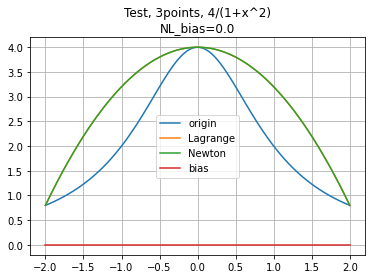

差商:
f(x0)=0.8
f(x0,x1)=1.2
f(x0,x1,x2)=0.4
f(x0,x1,x2,x3)=-0.7999999999999999
f(x0,x1,x2,x3,x4)=0.39999999999999997


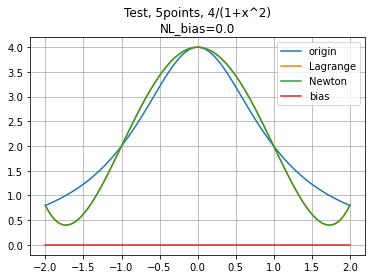

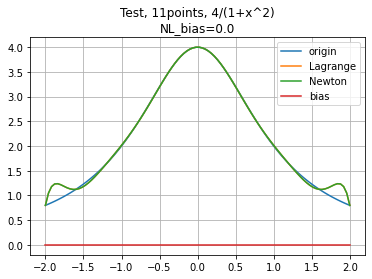

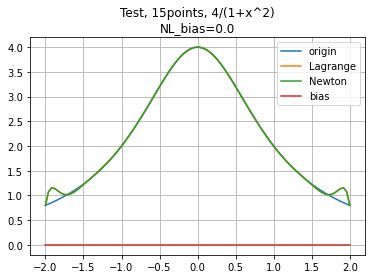

In [8]:
frac_test(points=3)
frac_test(points=5)
frac_test(points=11)
frac_test(points=15)

差商:
f(x0)=0.8
f(x0,x1)=1.2
f(x0,x1,x2)=0.4
f(x0,x1,x2,x3)=-0.7999999999999999
f(x0,x1,x2,x3,x4)=0.39999999999999997


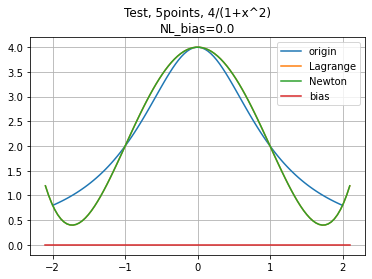

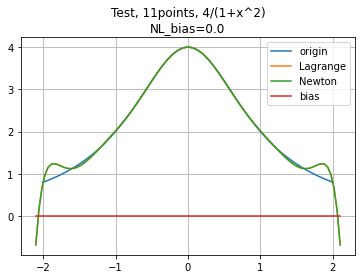

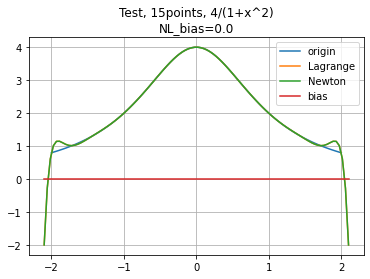

In [9]:
frac_test(points=5, bound_bias=0.1)
frac_test(points=11, bound_bias=0.1)
frac_test(points=15, bound_bias=0.1, showDif=False)

In [10]:
def poly_test(*, lower_bound=-5, upper_bound=5, points=11, bound_bias=0, showDif=True):
    
    """
    
    [lower_bound, upper_bound]: 给定点的范围
    points: 取点个数
    bound_bias: 插值范围的偏移量
    """
    if points > 10: 
        showDif=False
    
    X = np.linspace(lower_bound, upper_bound, 100)
    Y = X**3 + 3 * X**2 + X
    
    # 给定点
    someX = np.linspace(lower_bound, upper_bound, points)
    someY = someX**3 + 3 * someX**2 + someX
    
    # 拉格朗日插值法
    L_X = np.linspace(lower_bound-bound_bias, upper_bound+bound_bias, 100)
    L_Y = Lagrange_interpolation(someX, someY, L_X)
    
    # 牛顿插值法
    N_X = L_X
    N_Y = Newton_para(someX, someY, N_X, showDif_para=showDif)
    
    # 两种方法的误差
    bias_X = L_X
    bias_Y = L_Y-N_Y
    NL_bias=max(bias_Y)
    
    fig, ax = plt.subplots()
    plt.grid(visible=True)
    ax.plot(X, Y, label="origin")
    ax.plot(L_X, L_Y, label="Lagrange")
    ax.plot(N_X, N_Y, label = "Newton")
    ax.plot(bias_X, bias_Y, label="bias")
    ax.set_title(f"Test, {points}points, x^3+3x^2+x\nNL_bias={round(NL_bias, 12)}")
    ax.legend()
    plt.show()

In [11]:
def sin_test(*, lower_bound=-2, upper_bound=2, points=11, bound_bias=0, showDif=True):
    
    """
    
    [lower_bound, upper_bound]: 给定点的范围
    points: 取点个数
    bound_bias: 插值范围的偏移量
    """
    if points > 10: 
        showDif=False
    
    X = np.linspace(lower_bound, upper_bound, 100)
    Y = []
    for i in range(0, len(X)):
        Y.append(math.sin(X[i]))
    
    # 给定点
    someX = np.linspace(lower_bound, upper_bound, points)
    someY = []
    for i in range(0, len(someX)):
        someY.append(math.sin(someX[i]))
    
    # 拉格朗日插值法
    L_X = np.linspace(lower_bound-bound_bias, upper_bound+bound_bias, 100)
    L_Y = Lagrange_interpolation(someX, someY, L_X)
    
    # 牛顿插值法
    N_X = L_X
    N_Y = Newton_para(someX, someY, N_X, showDif_para=showDif)
    
    # 两种方法的误差
    bias_X = L_X
    bias_Y = L_Y-N_Y
    NL_bias=max(bias_Y)
    
    fig, ax = plt.subplots()
    plt.grid(visible=True)
    ax.plot(X, Y, label="origin")
    ax.plot(L_X, L_Y, label="Lagrange")
    ax.plot(N_X, N_Y, label = "Newton")
    ax.plot(bias_X, bias_Y, label="bias")
    ax.set_title(f"Test, {points}points, sinx\nNL_bias={round(NL_bias, 12)}")
    ax.legend()
    plt.show()

差商:
f(x0)=-55.0
f(x0,x1)=11.0
f(x0,x1,x2)=3.0


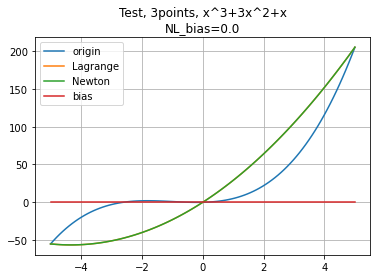

差商:
f(x0)=-55.0
f(x0,x1)=22.25
f(x0,x1,x2)=-4.5
f(x0,x1,x2,x3)=1.0
f(x0,x1,x2,x3,x4)=0.0


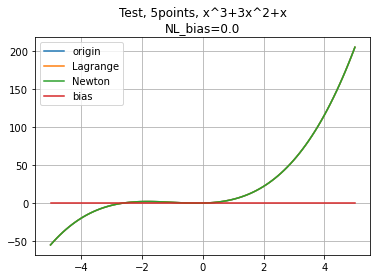

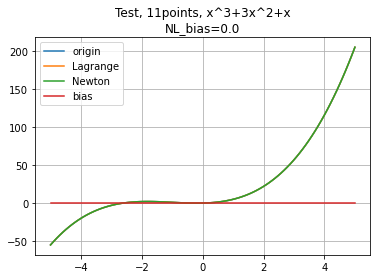

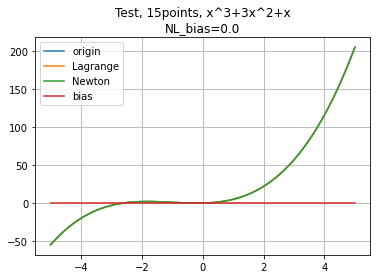

In [12]:
poly_test(points=3)
poly_test(points=5)
poly_test()
poly_test(points=15)

差商:
f(x0)=-55.0
f(x0,x1)=11.0
f(x0,x1,x2)=3.0


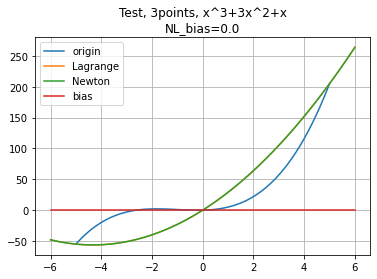

差商:
f(x0)=-55.0
f(x0,x1)=22.25
f(x0,x1,x2)=-4.5
f(x0,x1,x2,x3)=1.0
f(x0,x1,x2,x3,x4)=0.0


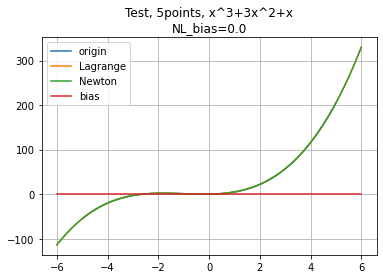

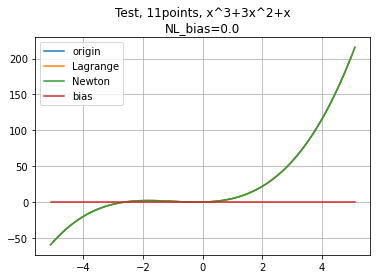

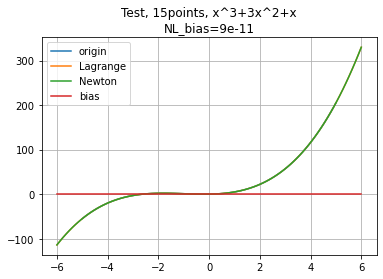

In [13]:
poly_test(points=3, bound_bias = 1)
poly_test(points=5, bound_bias = 1)
poly_test(bound_bias = 0.1)
poly_test(points=15, bound_bias = 1)

差商:
f(x0)=-0.9092974268256817
f(x0,x1)=0.45464871341284085
f(x0,x1,x2)=0.0


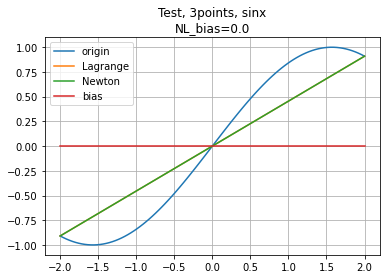

差商:
f(x0)=-0.9092974268256817
f(x0,x1)=0.0678264420177852
f(x0,x1,x2)=0.38682227139505565
f(x0,x1,x2,x3)=-0.1289407571316852
f(x0,x1,x2,x3,x4)=0.0


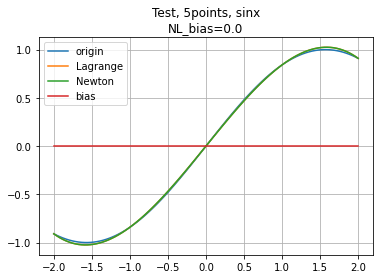

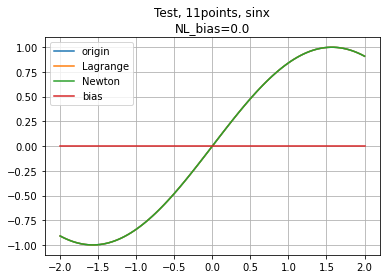

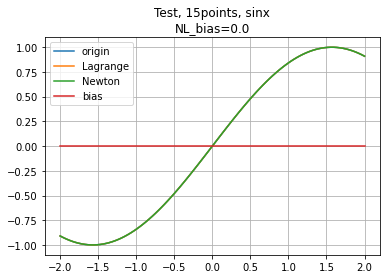

In [14]:
sin_test(points=3)
sin_test(points=5)
sin_test()
sin_test(points=15)

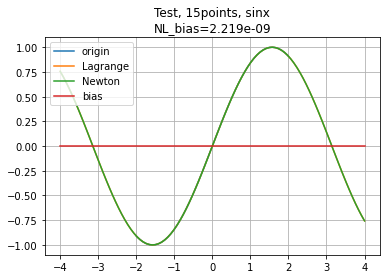

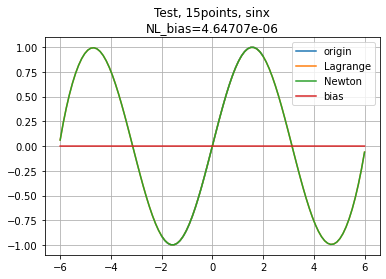

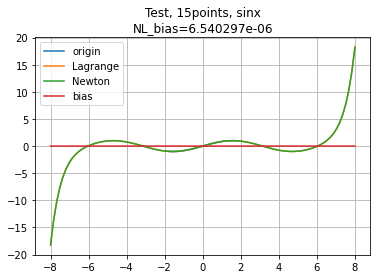

In [15]:
sin_test(points=15, bound_bias=2)
sin_test(points=15, bound_bias=4)
sin_test(points=15, bound_bias=6)